# Problem 1

Consider the following function:
$$f(x, y) = x^2 + 10y^2$$
A [contour plot](https://en.wikipedia.org/wiki/Contour_line) of this function is shown below.

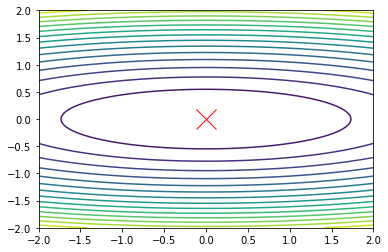

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_contour():
    x, y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
    plt.contour(x, y, x**2 + 10*y**2, levels=15)
    plt.plot(0, 0, 'rx', ms=20)
plot_contour()

As you can see, the minimum is at (0, 0), and the curve is much steeper in the y direction than in the x direction.

1. Minimize this function using gradient descent. Use the initial point $x = 2, y = 1$. Find one learning rate where optimization diverges and one "good" learning rate that reaches the minimum in at most 20 iterations. For your solution, you should plot the steps taken by your optimizer on top of the contour plot. If you have an array `x` and another `y` which represent the x and y values followed over the course of minimization, you can plot them on top of the contor plot by doing
```Python
plot_contour()
plt.plot(x, y, '-')
```

1. Show that minimizing this function using [Newton's Method](http://d2l.ai/chapter_optimization/gd.html#newtons-method) will converge to the minimum in a single step.

1. Minimize this function using the momentum optimizer. Set the momentum hyperparameter to $0.9$. Can you find a learning rate that allows momentum to converge in less than 20 steps? Now, try optimizing for 100 steps. What is the largest and smallest learning rate you can use when optimizing for 100 steps and still converge near the minumum?

1. Implement the Adam optimizer. Use the standard values for all hyperparameters $\beta_1 = 0.9, \beta_2 = 0.999, \epsilon = 10^{-6}, \eta = 0.001$. How many steps does it take for Adam to converge with these hyperparameters? Now, change $\eta$ to the largest value you found that worked for Momentum with 100 steps. Does Adam converge in 100 steps with this value of $\eta$?

In [ ]:
def f(x):
    return x[0]**2 + 10*x[1]**4

def df(x):
    return np.array([2, 20])*x

def minimize(initial, optimizer, N=100):
    x = np.zeros((N, len(initial)))
    x[0, :] = initial
    for n in range(1, N):
        x[n] = optimizer.step(df, x[n - 1], n)
    return x

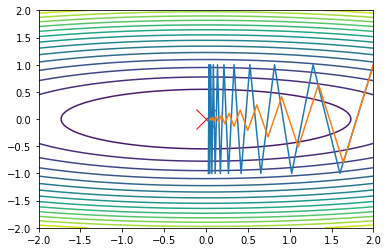

In [ ]:
class SGD:
    def __init__(self, eta):
        self.eta = eta
    def step(self, gradient, x, t):
        dx = gradient(x)
        return x - self.eta*dx

plot_contour()
x = minimize([2, 1], SGD(0.1), 20)
plt.plot(x[:, 0], x[:, 1], '-')
x = minimize([2, 1], SGD(0.09), 20)
plt.plot(x[:, 0], x[:, 1], '-')

$$f(x, y) = x^2 + 10y^2$$
$$\nabla f(x, y) = [2x, 20y]$$
$$H = \nabla^2 f(x, y) = \begin{bmatrix}
2 & 0 \\
0 & 20 \\
\end{bmatrix}$$
$$H^{-1} = \begin{bmatrix}
\frac{1}{2} & 0 \\
0 & \frac{1}{20} \\
\end{bmatrix}$$
If the initial point is $x_0, y_0$, Newton's method will set $x_1 = x_0 - H^{-1}\nabla_x f(x, y) = x_0 - \frac{1}{2} 2x_0 = 0$ and similarly for $y$.

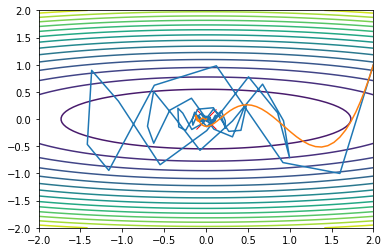

In [ ]:
class Momentum:
    def __init__(self, eta, beta=0.9):
        self.eta = eta
        self.beta = beta
        self.state = None

    def step(self, gradient, x, t):
        v = np.zeros_like(x) if self.state is None else self.state
        v = self.beta * v + gradient(x)
        self.state = v
        return x - self.eta*v

plot_contour()
x = minimize([2, 1], Momentum(0.1), 100)
plt.plot(x[:, 0], x[:, 1], '-')
x = minimize([2, 1], Momentum(0.003), 100)
plt.plot(x[:, 0], x[:, 1], '-')

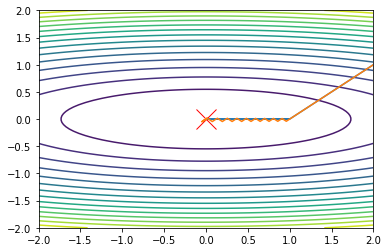

In [ ]:
class Adam:
    def __init__(self, eta=0.001, beta1=0.9, beta2=0.999, epsilon=1e-6):
        self.eta = eta
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.state = None

    def step(self, gradient, x, t):
        state = np.zeros((x.shape[0], 2)) if self.state is None else self.state
        v = state[:, 0]
        s = state[:, 1]
        g = gradient(x)
        v = self.beta1 * v + (1 - self.beta1)*g
        s = self.beta2 * s + (1 - self.beta2)*g**2
        vhat = v / (1 - self.beta1**t)
        shat = s / (1 - self.beta2**t)
        gprime = self.eta * vhat / (np.sqrt(shat) + self.epsilon)
        state[:, 0] = v
        state[:, 1] = s
        return x - gprime

plot_contour()
x = minimize([2, 1], Adam(), 1100)
plt.plot(x[:, 0], x[:, 1], '-')
x = minimize([2, 1], Adam(0.1), 40)
plt.plot(x[:, 0], x[:, 1], '-')

# Problem 2

Now, consider minimization of the ["three-hump camel function"](https://www.sfu.ca/~ssurjano/camel3.html):

$$f(x, y) = 2x^2 - 1.05x^4 + \frac{x_1^6}{6} + xy + y^2$$

This function also has a minimum at $(0, 0)$. Below is a contour plot.

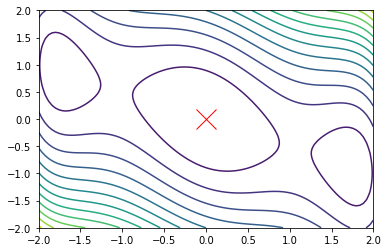

In [ ]:
def plot_contour():
    x, y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
    plt.contour(x, y, 2*x**2 - 1.05*x**4 + x**6/6 + x*y + y**2, levels=15)
    plt.plot(0, 0, 'rx', ms=20)
plot_contour()

As in the first problem, assume that optimization starts from $x = 2, y = 1$. Try minimizing it with SGD, Adam, and Momentum, while only changing the learning rate for each (not the momentum or other hyperparameters). Try to find an optimizer and learning rate that can reach the **global** minimum in as few steps as possible.

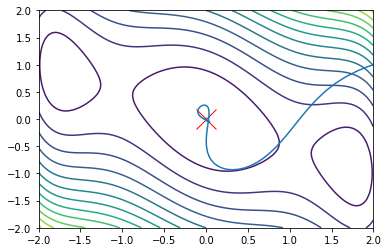

In [ ]:
def f(x):
    return 2*x[0]**2 - 1.05*x[0]**4 + x[0]**6/6 + x[0]*x[1] + x[1]**2

def df(x):
    return np.array([
        4*x[0] - 4.2*x[0]**3 + x[0]**5 + x[1],
        x[0] + 2*x[1],
    ])

def minimize(initial, optimizer, N=100):
    x = np.zeros((N, len(initial)))
    x[0, :] = initial
    for n in range(1, N):
        x[n] = optimizer.step(df, x[n - 1], n)
    return x

plot_contour()
x = minimize([2, 1], Momentum(0.01), 100)
plt.plot(x[:, 0], x[:, 1], '-')